In [1]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel(r"C:\Users\madhu\Downloads\School data.xlsx")

In [4]:
data

,School_ID,District,Block,Urban_Rural,%_Math_Score,%_Language_Score,%_Science_Score,Teacher_Student_Ratio,Avg_Teacher_Experience_Years,Teacher_Trainings_Attended,Electricity_Available,Internet_Available,Functional_Toilets,Library_Available,%_Marginalized_Students,%_Students_With_Home_Internet,Parent_Literacy_Rate
0,SCH_1,District_C,Block_C1,Rural,43.32,48.87,48.89,40.1,5.7,1,1,0.0,1,0,29.7,5.7,33.9
1,SCH_2,District_A,Block_A3,Rural,81.98,83.18,83.26,NaN,5.8,1,1,0.0,0,0,36.1,4.0,40.6
2,SCH_3,District_B,Block_B1,Rural,44.68,46.38,40.19,29.9,7.1,2,1,1.0,0,0,38.9,17.4,47.6
3,SCH_4,District_A,Block_A1,Urban,44.86,35.20,47.77,24.6,2.6,1,1,1.0,0,0,11.2,35.8,73.3
4,SCH_5,District_C,Block_C1,Rural,47.41,47.94,50.99,39.8,6.1,1,1,0.0,1,0,33.1,13.6,35.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,SCH_5196,District_A,Block_A3,Rural,NaN,63.21,67.84,17.5,13.7,0,1,0.0,1,0,24.8,0.0,52.5
5196,SCH_5197,District_A,Block_A1,Urban,64.93,65.44,43.21,37.4,13.3,0,1,1.0,1,1,24.3,32.1,52.1
5197,SCH_5198,District_B,Block_B1,Rural,67.46,66.19,67.65,40.3,12.7,2,0,0.0,1,0,34.3,19.7,31.1
5198,SCH_5199,District_C,Block_C2,Urban,58.35,74.95,57.28,35.1,0.0,2,1,0.0,1,1,23.8,3.4,33.6


In [5]:
data.head()

,School_ID,District,Block,Urban_Rural,%_Math_Score,%_Language_Score,%_Science_Score,Teacher_Student_Ratio,Avg_Teacher_Experience_Years,Teacher_Trainings_Attended,Electricity_Available,Internet_Available,Functional_Toilets,Library_Available,%_Marginalized_Students,%_Students_With_Home_Internet,Parent_Literacy_Rate
0,SCH_1,District_C,Block_C1,Rural,43.32,48.87,48.89,40.1,5.7,1,1,0.0,1,0,29.7,5.7,33.9
1,SCH_2,District_A,Block_A3,Rural,81.98,83.18,83.26,NaN,5.8,1,1,0.0,0,0,36.1,4.0,40.6
2,SCH_3,District_B,Block_B1,Rural,44.68,46.38,40.19,29.9,7.1,2,1,1.0,0,0,38.9,17.4,47.6
3,SCH_4,District_A,Block_A1,Urban,44.86,35.20,47.77,24.6,2.6,1,1,1.0,0,0,11.2,35.8,73.3
4,SCH_5,District_C,Block_C1,Rural,47.41,47.94,50.99,39.8,6.1,1,1,0.0,1,0,33.1,13.6,35.3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   School_ID                      5200 non-null   object 
 1   District                       5200 non-null   object 
 2   Block                          5200 non-null   object 
 3   Urban_Rural                    5200 non-null   object 
 4   %_Math_Score                   4942 non-null   float64
 5   %_Language_Score               5200 non-null   float64
 6   %_Science_Score                5200 non-null   float64
 7   Teacher_Student_Ratio          4940 non-null   float64
 8   Avg_Teacher_Experience_Years   5200 non-null   float64
 9   Teacher_Trainings_Attended     5200 non-null   int64  
 10  Electricity_Available          5200 non-null   int64  
 11  Internet_Available             4940 non-null   float64
 12  Functional_Toilets             5200 non-null   i

In [7]:
# checking for null values
data.isnull().sum()

School_ID                          0
District                           0
Block                              0
Urban_Rural                        0
%_Math_Score                     258
%_Language_Score                   0
%_Science_Score                    0
Teacher_Student_Ratio            260
Avg_Teacher_Experience_Years       0
Teacher_Trainings_Attended         0
Electricity_Available              0
Internet_Available               260
Functional_Toilets                 0
Library_Available                  0
%_Marginalized_Students            0
%_Students_With_Home_Internet      0
Parent_Literacy_Rate             259
dtype: int64

In [8]:
# Handeling missing values
data = data.dropna(subset=['%_Math_Score'])
data['Teacher_Student_Ratio'].fillna(data['Teacher_Student_Ratio'].median(), inplace = True)
data['Internet_Available'].fillna(0, inplace = True)
data['Parent_Literacy_Rate'] = data.groupby('Block')['Parent_Literacy_Rate'].transform(lambda x: x.fillna(x.mean()))
data['Parent_Literacy_Rate'].fillna(data['Parent_Literacy_Rate'].median(), inplace=True)

In [9]:
data.isnull().sum()

School_ID                        0
District                         0
Block                            0
Urban_Rural                      0
%_Math_Score                     0
%_Language_Score                 0
%_Science_Score                  0
Teacher_Student_Ratio            0
Avg_Teacher_Experience_Years     0
Teacher_Trainings_Attended       0
Electricity_Available            0
Internet_Available               0
Functional_Toilets               0
Library_Available                0
%_Marginalized_Students          0
%_Students_With_Home_Internet    0
Parent_Literacy_Rate             0
dtype: int64

In [10]:
# Convert categorical variables
data['Urban_Rural'] = data['Urban_Rural'].astype('category')
data['District'] = data['District'].astype('category')
data['Block'] = data['Block'].astype('category')
data['Library_Available'] = data['Library_Available'].astype('category')
data['Internet_Available'] = data['Internet_Available'].astype('category')
data['Electricity_Available'] = data['Electricity_Available'].astype('category')
data['Functional_Toilets'] = data['Functional_Toilets'].astype('category')

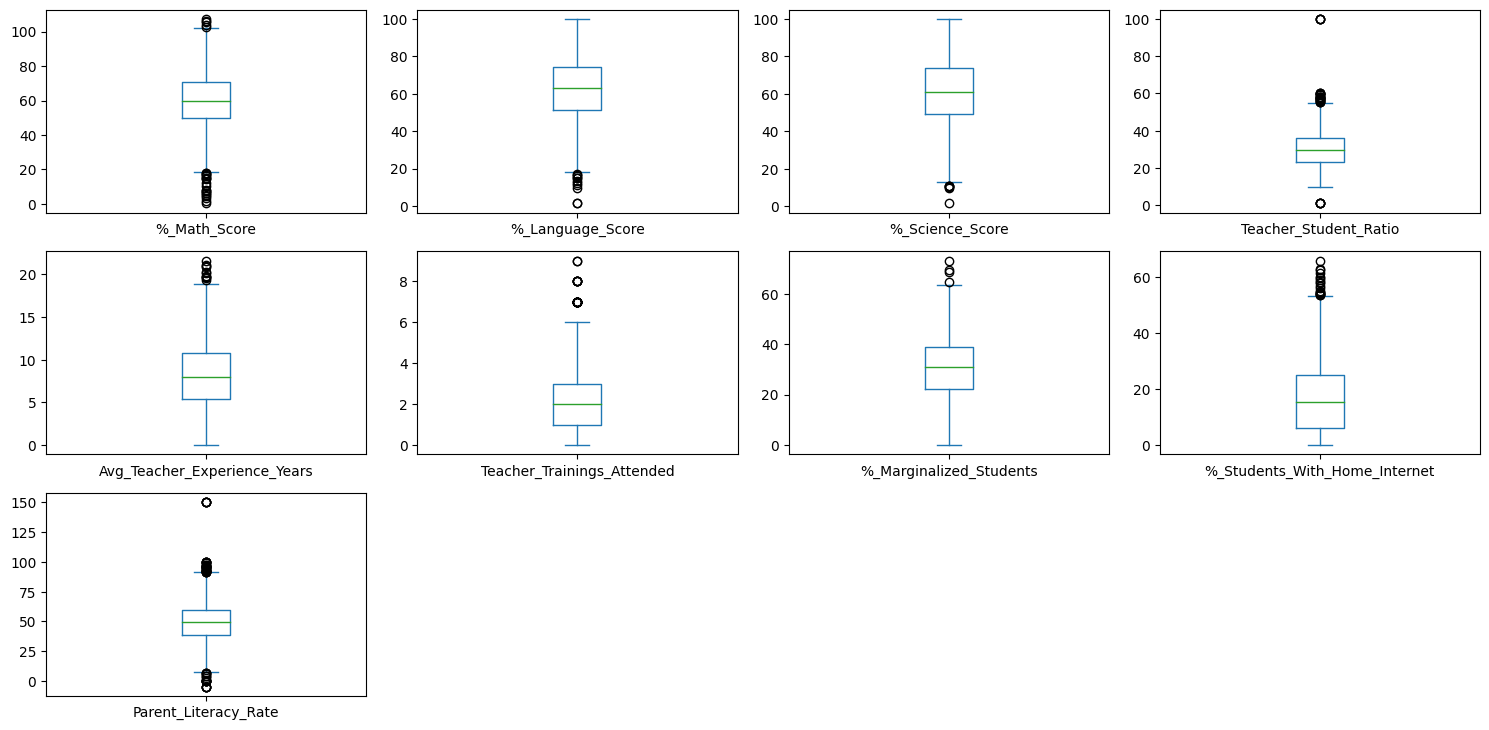

In [11]:
# checking for outliers
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots
data[numeric_cols].plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 12), sharex=False)
plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import zscore

z_scores = data[numeric_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("Outlier counts per column:\n", outliers)

Outlier counts per column:
 %_Math_Score                     16
%_Language_Score                  6
%_Science_Score                   1
Teacher_Student_Ratio            11
Avg_Teacher_Experience_Years      6
Teacher_Trainings_Attended       28
%_Marginalized_Students           3
%_Students_With_Home_Internet    12
Parent_Literacy_Rate             21
dtype: int64


In [13]:
data.columns

Index(['School_ID', 'District', 'Block', 'Urban_Rural', '%_Math_Score',
       '%_Language_Score', '%_Science_Score', 'Teacher_Student_Ratio',
       'Avg_Teacher_Experience_Years', 'Teacher_Trainings_Attended',
       'Electricity_Available', 'Internet_Available', 'Functional_Toilets',
       'Library_Available', '%_Marginalized_Students',
       '%_Students_With_Home_Internet', 'Parent_Literacy_Rate'],
      dtype='object')

In [66]:
data_cleaned = data.copy()
data_cleaned.to_csv("cleaned_School_Data.csv", index=False)

In [14]:
#features to normalize (excluding target: '%_Math_Score')
features_to_normalize = [
    '%_Language_Score', '%_Science_Score',
    'Teacher_Student_Ratio', 'Avg_Teacher_Experience_Years',
    'Teacher_Trainings_Attended',
    '%_Marginalized_Students', '%_Students_With_Home_Internet',
    'Parent_Literacy_Rate'
]

# Apply StandardScaler
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Save to CSV
data_scaled.to_csv("Normalized_School_Data.csv", index=False)
print("Normalized data saved to 'Normalized_School_Data.csv'")

Normalized data saved to 'Normalized_School_Data.csv'


In [15]:
# Cleaned and processed dataset
df = pd.read_csv('Normalized_School_Data.csv')

In [16]:
df

,School_ID,District,Block,Urban_Rural,%_Math_Score,%_Language_Score,%_Science_Score,Teacher_Student_Ratio,Avg_Teacher_Experience_Years,Teacher_Trainings_Attended,Electricity_Available,Internet_Available,Functional_Toilets,Library_Available,%_Marginalized_Students,%_Students_With_Home_Internet,Parent_Literacy_Rate
0,SCH_1,District_C,Block_C1,Rural,43.32,-0.858806,-0.696969,1.049009,-0.611944,-0.694907,1,0.0,1,0,-0.056150,-0.866933,-0.958241
1,SCH_2,District_A,Block_A3,Rural,81.98,1.222634,1.213515,-0.017155,-0.586345,-0.694907,1,0.0,0,0,0.480007,-1.000031,-0.552337
2,SCH_3,District_B,Block_B1,Rural,44.68,-1.009864,-1.180565,-0.001703,-0.253560,0.004814,1,1.0,0,0,0.714576,0.049097,-0.128258
3,SCH_4,District_A,Block_A1,Urban,44.86,-1.688106,-0.759225,-0.547661,-1.405510,-0.694907,1,1.0,0,0,-1.605981,1.489692,1.428718
4,SCH_5,District_C,Block_C1,Rural,47.41,-0.915225,-0.580239,1.018106,-0.509549,-0.694907,1,0.0,1,0,0.228683,-0.248417,-0.873425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,SCH_5195,District_C,Block_C1,Rural,58.37,0.646917,-1.026037,1.522859,-0.176763,-0.694907,1,0.0,1,1,0.237061,-0.561590,-2.454633
4938,SCH_5197,District_A,Block_A1,Urban,64.93,0.146425,-1.012696,0.770879,1.333572,-1.394628,1,1.0,1,1,-0.508533,1.200007,0.144364
4939,SCH_5198,District_B,Block_B1,Rural,67.46,0.191924,0.345821,1.069611,1.179979,0.004814,0,0.0,1,0,0.329213,0.229172,-1.127872
4940,SCH_5199,District_C,Block_C2,Urban,58.35,0.723355,-0.230604,0.533954,-2.071082,0.004814,1,0.0,1,1,-0.550421,-1.047007,-0.976416


In [17]:
df.isnull().sum()

School_ID                        0
District                         0
Block                            0
Urban_Rural                      0
%_Math_Score                     0
%_Language_Score                 0
%_Science_Score                  0
Teacher_Student_Ratio            0
Avg_Teacher_Experience_Years     0
Teacher_Trainings_Attended       0
Electricity_Available            0
Internet_Available               0
Functional_Toilets               0
Library_Available                0
%_Marginalized_Students          0
%_Students_With_Home_Internet    0
Parent_Literacy_Rate             0
dtype: int64

In [18]:
df.drop('School_ID', axis = 1)

,District,Block,Urban_Rural,%_Math_Score,%_Language_Score,%_Science_Score,Teacher_Student_Ratio,Avg_Teacher_Experience_Years,Teacher_Trainings_Attended,Electricity_Available,Internet_Available,Functional_Toilets,Library_Available,%_Marginalized_Students,%_Students_With_Home_Internet,Parent_Literacy_Rate
0,District_C,Block_C1,Rural,43.32,-0.858806,-0.696969,1.049009,-0.611944,-0.694907,1,0.0,1,0,-0.056150,-0.866933,-0.958241
1,District_A,Block_A3,Rural,81.98,1.222634,1.213515,-0.017155,-0.586345,-0.694907,1,0.0,0,0,0.480007,-1.000031,-0.552337
2,District_B,Block_B1,Rural,44.68,-1.009864,-1.180565,-0.001703,-0.253560,0.004814,1,1.0,0,0,0.714576,0.049097,-0.128258
3,District_A,Block_A1,Urban,44.86,-1.688106,-0.759225,-0.547661,-1.405510,-0.694907,1,1.0,0,0,-1.605981,1.489692,1.428718
4,District_C,Block_C1,Rural,47.41,-0.915225,-0.580239,1.018106,-0.509549,-0.694907,1,0.0,1,0,0.228683,-0.248417,-0.873425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,District_C,Block_C1,Rural,58.37,0.646917,-1.026037,1.522859,-0.176763,-0.694907,1,0.0,1,1,0.237061,-0.561590,-2.454633
4938,District_A,Block_A1,Urban,64.93,0.146425,-1.012696,0.770879,1.333572,-1.394628,1,1.0,1,1,-0.508533,1.200007,0.144364
4939,District_B,Block_B1,Rural,67.46,0.191924,0.345821,1.069611,1.179979,0.004814,0,0.0,1,0,0.329213,0.229172,-1.127872
4940,District_C,Block_C2,Urban,58.35,0.723355,-0.230604,0.533954,-2.071082,0.004814,1,0.0,1,1,-0.550421,-1.047007,-0.976416


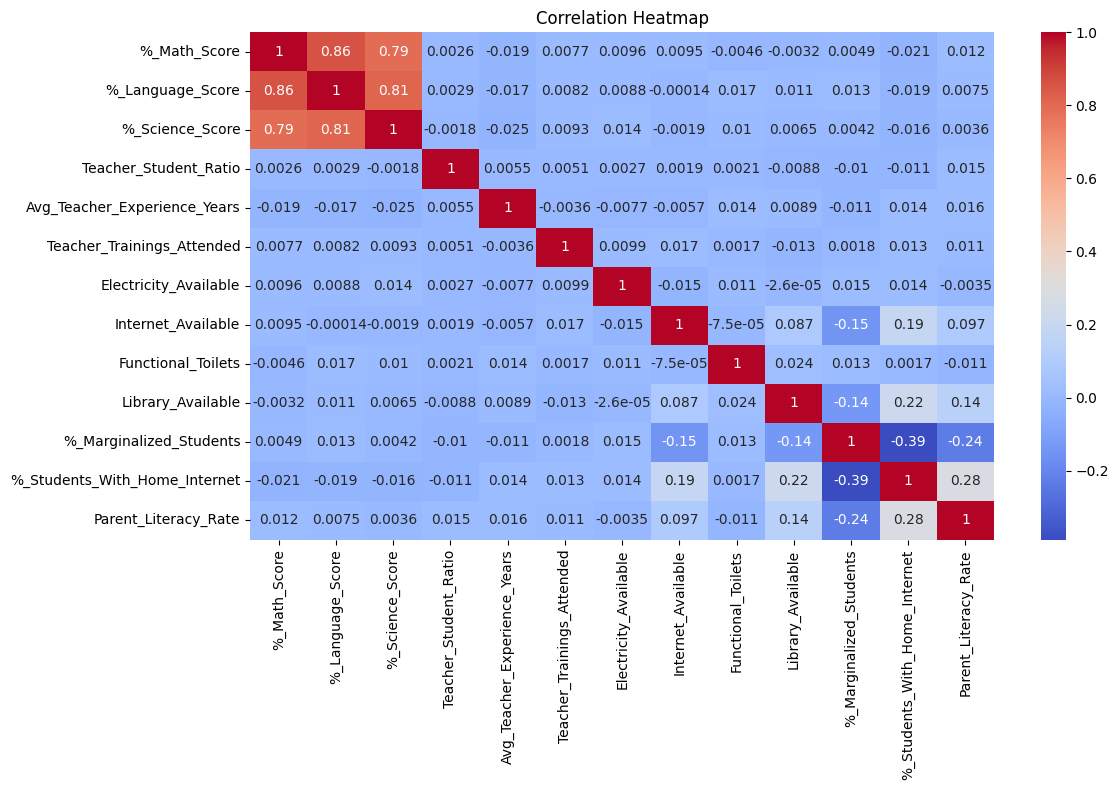

In [19]:
#correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

correlation matrix shows Math Score is highly correlated with Science and Language scores.
Parent literacy also shows moderate positive correlation.


# Analysis with two correlated features

# Linear Regression

In [20]:
# Multiple linear Regression

features = ['%_Language_Score', '%_Science_Score']                          
x = df[features]
y = df['%_Math_Score']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred = reg.predict(x_test)

In [23]:
# Data Evaluation on matrics


# Evaluate
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 5.464681594638724
MSE: 50.037072304600436
R2 Score: 0.7749309597653532


R² score indicates how well our model explains variation in Math scores.
MAE and MSE reflect prediction errors; lower values = better performance.


# Decision Tree

In [24]:

regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [25]:
y_pred = regressor.predict(x_test)

In [26]:
# Evaluate
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 5.759870741686956
MSE: 55.93486298556185
R2 Score: 0.7484024274805658


# Support Vector Machine

In [27]:

svr = SVR(kernel='linear')
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [28]:
y_pred = svr.predict(x_test)

In [29]:
# Evaluate
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 5.480622419831739
MSE: 50.12677719461926
R2 Score: 0.774527463066386


# Random Forest

In [30]:
features = ['%_Language_Score', '%_Science_Score']                            
x = df[features]
y = df['%_Math_Score']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)

In [32]:
rf = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [33]:
y_pred = rf.predict(x_test)

In [34]:
# Evaluate
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 6.145366391007853
MSE: 62.03822091308516
R2 Score: 0.720949244316812


# Analysis with all features

# Linear Regression

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [36]:
y_pred = reg.predict(x_test)

In [37]:
# Evaluate
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 5.464681594638724
MSE: 50.037072304600436
R2 Score: 0.7749309597653532


# Encoding

In [38]:
le = LabelEncoder()
df['District'] = le.fit_transform(df['District'])
df['Block'] = le.fit_transform(df['Block'])
df['Urban_Rural'] = le.fit_transform(df['Urban_Rural'])

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
features = df.drop(columns=['%_Math_Score','School_ID']).columns                          
x = df[features]
y = df['%_Math_Score']

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)

In [41]:
rfr = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [42]:
y_pred = rfr.predict(x_test)

In [43]:
# Evaluate
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 5.937353454363328
MSE: 59.55488543724403
R2 Score: 0.7321194008904376


# Clustering

# K-Means

In [48]:
## Clustering using KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(x)

In [49]:
# Standardizing the input features before clustering and PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [50]:
# Calculate silhouette scores for k = 3 to 8
from sklearn.metrics import silhouette_score
silhouette_scores = {}
for k in range(3, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[k] = round(score, 3)

silhouette_scores

{3: 0.114, 4: 0.096, 5: 0.097, 6: 0.107, 7: 0.101, 8: 0.093}

# PCA Using Clustering

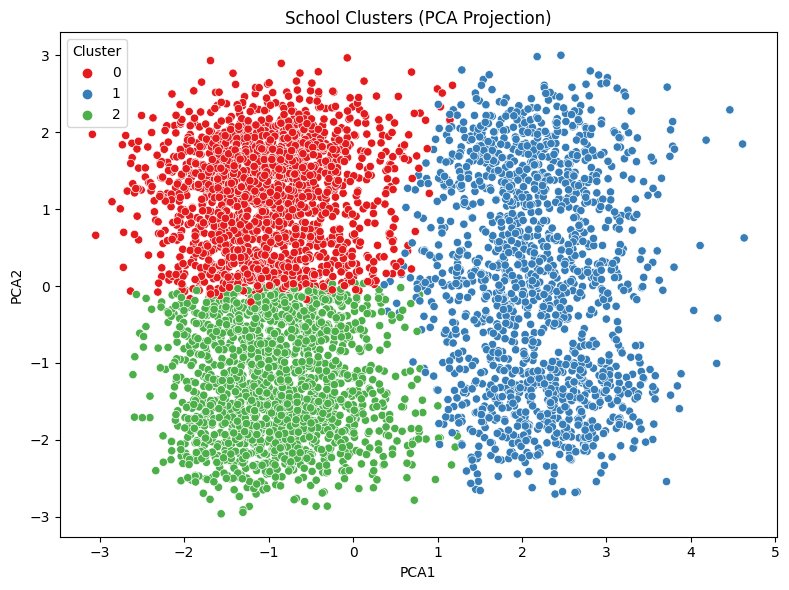

In [64]:
features = [
    '%_Language_Score', '%_Science_Score', 'Teacher_Student_Ratio',
    'Avg_Teacher_Experience_Years', 'Teacher_Trainings_Attended',
    'Electricity_Available', 'Internet_Available', 'Functional_Toilets',
    'Library_Available', '%_Marginalized_Students',
    '%_Students_With_Home_Internet', 'Parent_Literacy_Rate'
]


# Apply KMeans clustering with k=3 (based on silhouette or elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualize PCA clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("School Clusters (PCA Projection)")
plt.tight_layout()
plt.savefig("Cluster_PCA_Visualization.png")
plt.show()

PCA reduces dimensionality while preserving variance.
The scatterplot shows distinct clusters — useful for targeting interventions.


# The analysis revealed that schools with better infrastructure (toilets, electricity, internet), higher parental literacy, and lower teacher-student ratios tend to have higher math performance. Clustering segmented schools into 3 distinct groups: high-performing, moderate, and low-performing — which can be used to design targeted improvement strategies.